# Sebastian Arango Urrea

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import Image

# Actividad 1

Lea con OpenCV 2 imagenes que se encuentran en la carpeta "res/actividad1" (pato.jpg, gato.jpg). Convierta las imagenes a RGB y luego divida la imagen en cuadro cuadrantes: el primer y tercer cuadrante deberán de tener banderas, el segundo cuadrante deberá de tener sólo el canal verde, el cuarto cuadrante quedará sin cambio alguno. Muestre las imagenes resultantes.

### Ejemplo:

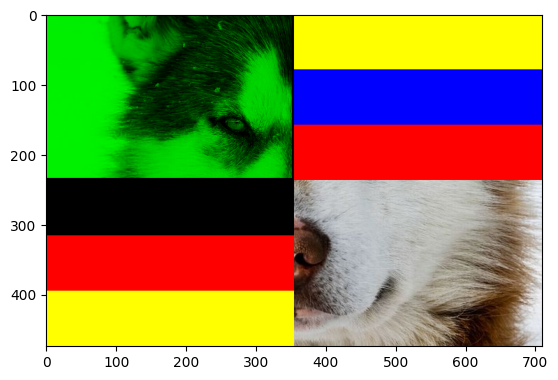

In [127]:
Image("res/actividad1/perroModificado.png")

In [3]:
perro = cv2.imread("res/actividad1/perro.jpg",cv2.IMREAD_COLOR)
perro = cv2.cvtColor(perro, cv2.COLOR_BGR2RGB)

gato = cv2.imread("res/actividad1/gato.jpg",cv2.IMREAD_COLOR)
gato = cv2.cvtColor(gato, cv2.COLOR_BGR2RGB)

pato = cv2.imread("res/actividad1/pato.jpg",cv2.IMREAD_COLOR)
pato = cv2.cvtColor(pato, cv2.COLOR_BGR2RGB)

def banderaColombia(imagen):
    height,width = np.shape(imagen)[:2]
    #Amarillo
    imagen[:height//6,width//2:] = (255,255,0)
    #Azul
    imagen[height//6:height//3,width//2:] = (0,0,255)
    # Rojo
    imagen[height//3:height//2,width//2:] = (255,0,0)
    return imagen

def banderaAlemania(imagen):
    height,width = np.shape(imagen)[:2]
    # Negro
    imagen[height//2:2*height//3,:width//2] = (0,0,0)
    # Rojo
    imagen[2*height//3:5*height//6,:width//2] = (255,0,0)
    # Amarillo
    imagen[5*height//6:,:width//2] = (255,255,0)
    return imagen

def cuadroVerde(imagen):
    height,width = np.shape(imagen)[:2]
    # Extract the green channel and set other channels to zero
    imagen[:height//2,:width//2,0] = 0
    imagen[:height//2,:width//2,2] = 0
    return imagen

def FiltroRaro(imagen):
    return cuadroVerde(banderaAlemania(banderaColombia(imagen)))


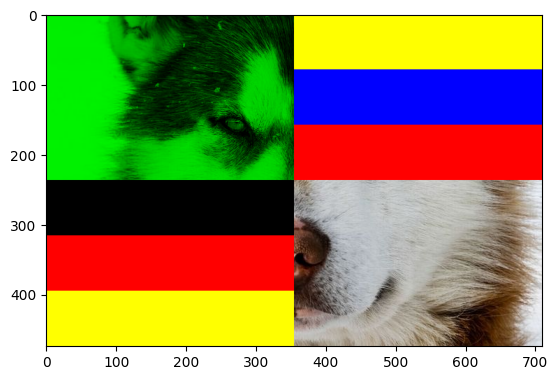

In [136]:
plt.imshow(FiltroRaro(perro)) 

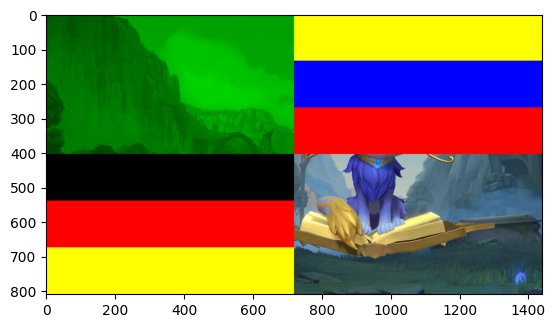

In [137]:
plt.imshow(FiltroRaro(gato)) 

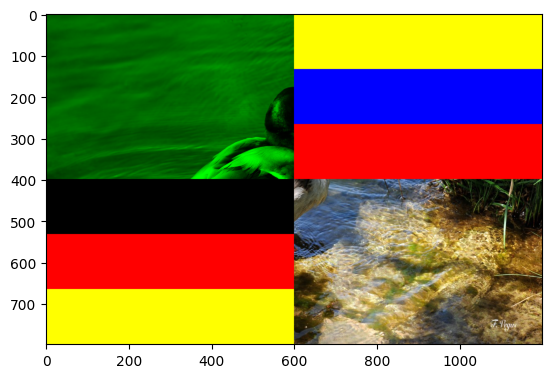

In [138]:
plt.imshow(FiltroRaro(pato)) 

## Actividad 2

Para el análisis de imagenes no sólo se usa RGB, sino que se tiende a usar diferentes espacios de color para abordar los problemas de visión artificial. Algunos son: HSV, LAB, XYZ, entre otros. La idea de esta actividad es que usted sepa transformar las imagenes a los demás espacios de color y pueda identificar cual es el más apropiado para el análisis de la imagen.
<br>
 1. Leer las imagenes "res/actividad2/bola.png" y "res/actividad2/tigre.png" con OpenCV.
 2. Usar los diferentes espacios de color aprendidos en clase y dividirlos por sus canales de color.
 3. Concluir cual canal es el más apropiado para la identifición de la bola y tigre (no se preocupe si la segmentación no es perfecta, la idea es que identifique la diferencia entre cada canal y sus ventajas).

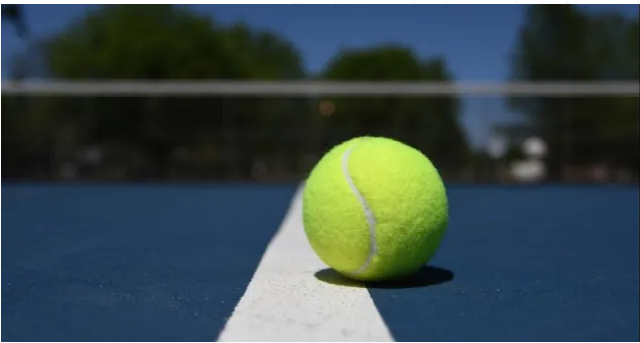

In [4]:
Image("res/actividad2/bola.png")

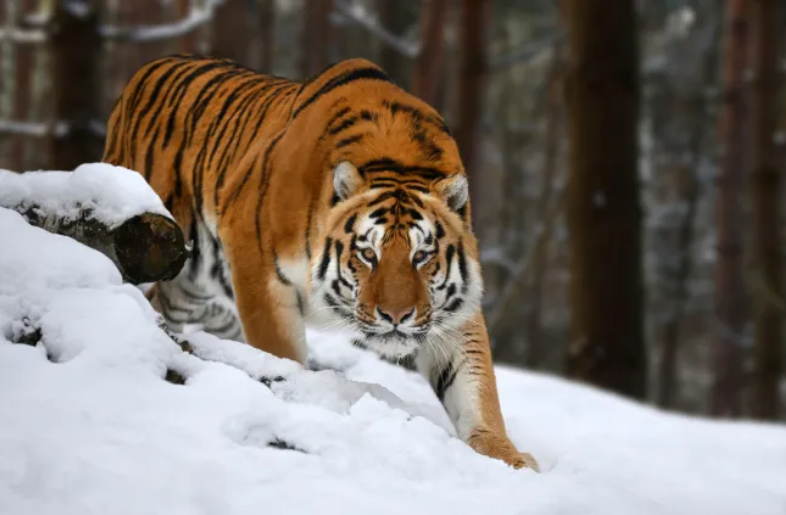

In [5]:
Image("res/actividad2/tigre.png")

(343, 640, 3)


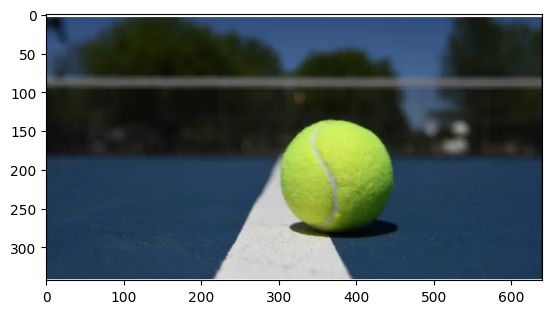

In [162]:
bola = cv2.imread("res/actividad2/bola.png",cv2.IMREAD_COLOR)
bola = cv2.cvtColor(bola, cv2.COLOR_BGR2RGB)
plt.imshow(bola)
print(bola.shape)

(515, 786, 3)


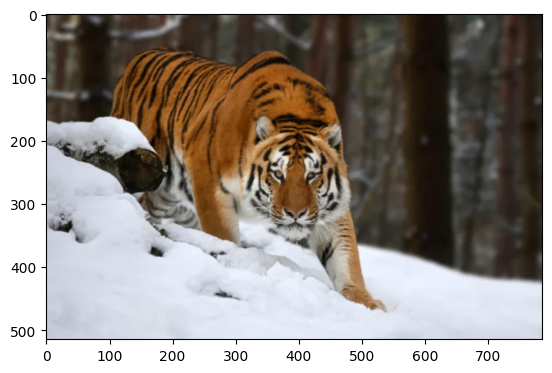

In [7]:
tigre = cv2.imread("res/actividad2/tigre.png",cv2.IMREAD_COLOR)
tigre = cv2.cvtColor(tigre, cv2.COLOR_BGR2RGB)
plt.imshow(tigre)
print(tigre.shape)

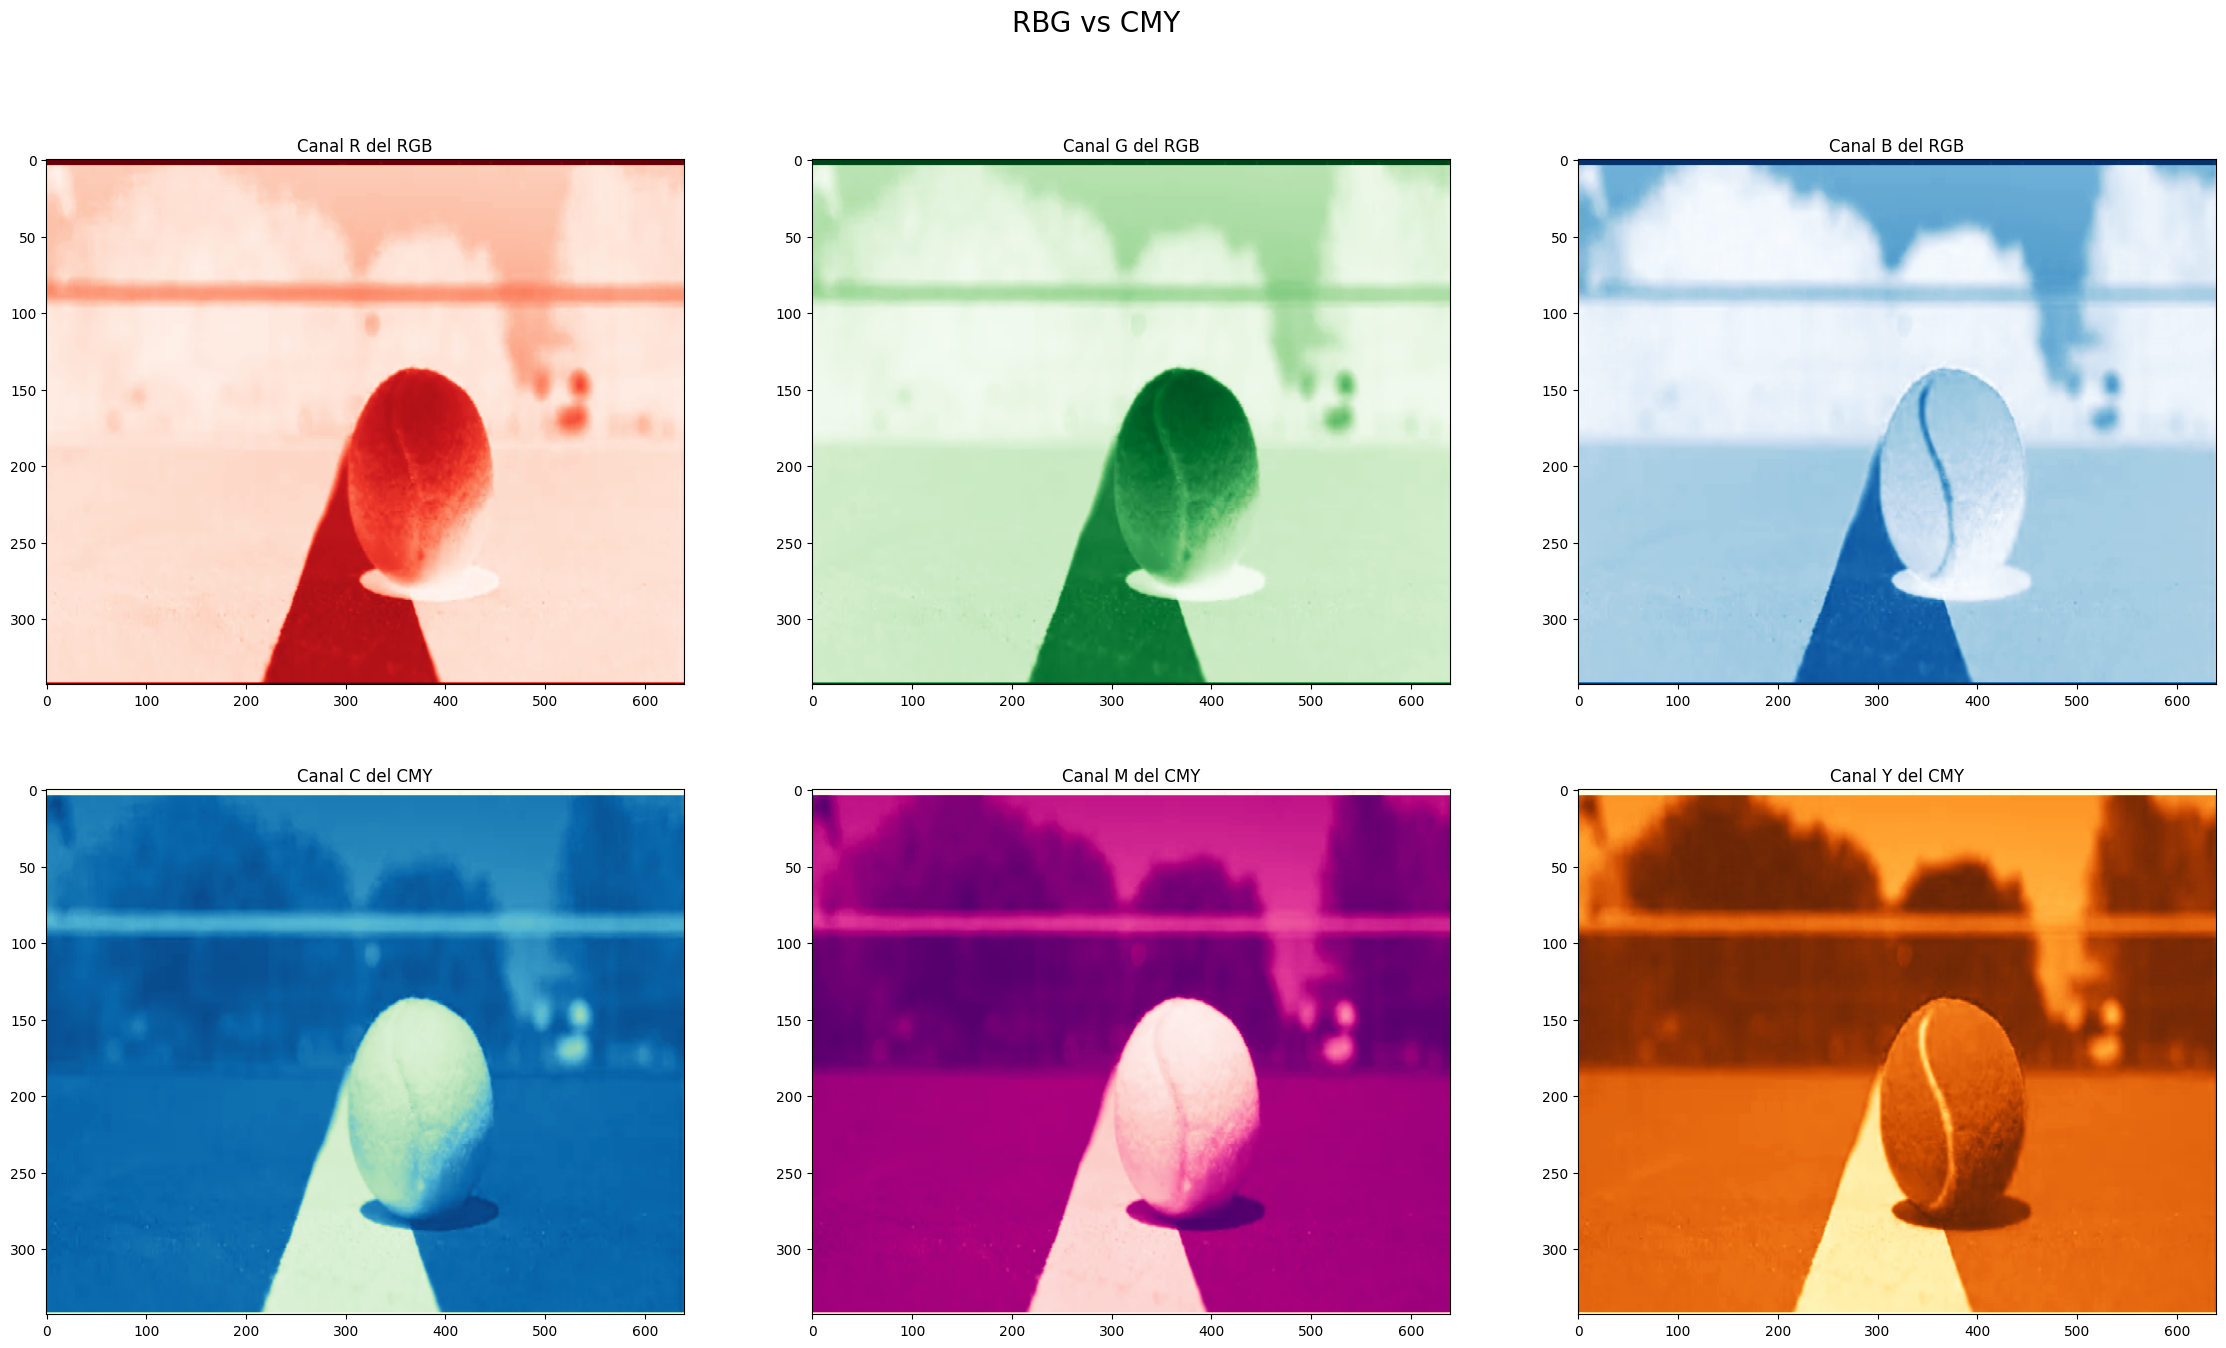

In [167]:
#Aquí se descompone cada canal de la imagen
bola_R = bola[:,:,0]
bola_G = bola[:,:,1]
bola_B = bola[:,:,2]
#Se obtiene cada canal del espacio CMY con una transformación lineal
#a los canales R, G y B
bola_C = 255 - bola[:,:,0]
bola_M = 255 - bola[:,:,1]
bola_Y = 255 - bola[:,:,2]

#Se crea un subplot de 2x3, para mostrar las 6 imágenes y compararlas.
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(28, 15))
fig.suptitle('RBG vs CMY', fontsize=20)
ax1.set_title('Canal R del RGB')
ax1.imshow(bola_R, cmap='Reds', aspect='auto')
ax2.set_title('Canal G del RGB')
ax2.imshow(bola_G, cmap='Greens', aspect='auto')
ax3.set_title('Canal B del RGB')
ax3.imshow(bola_B, cmap='Blues', aspect='auto')
ax4.set_title('Canal C del CMY')
ax4.imshow(bola_C, cmap='GnBu', aspect='auto')
ax5.set_title('Canal M del CMY')
ax5.imshow(bola_M, cmap='RdPu', aspect='auto')
ax6.set_title('Canal Y del CMY')
ax6.imshow(bola_Y, cmap='YlOrBr', aspect='auto')

## Canal más adecuado
**Canal Y del CMY** Debido a la nitidez y buena definicion de la bola en la imagen

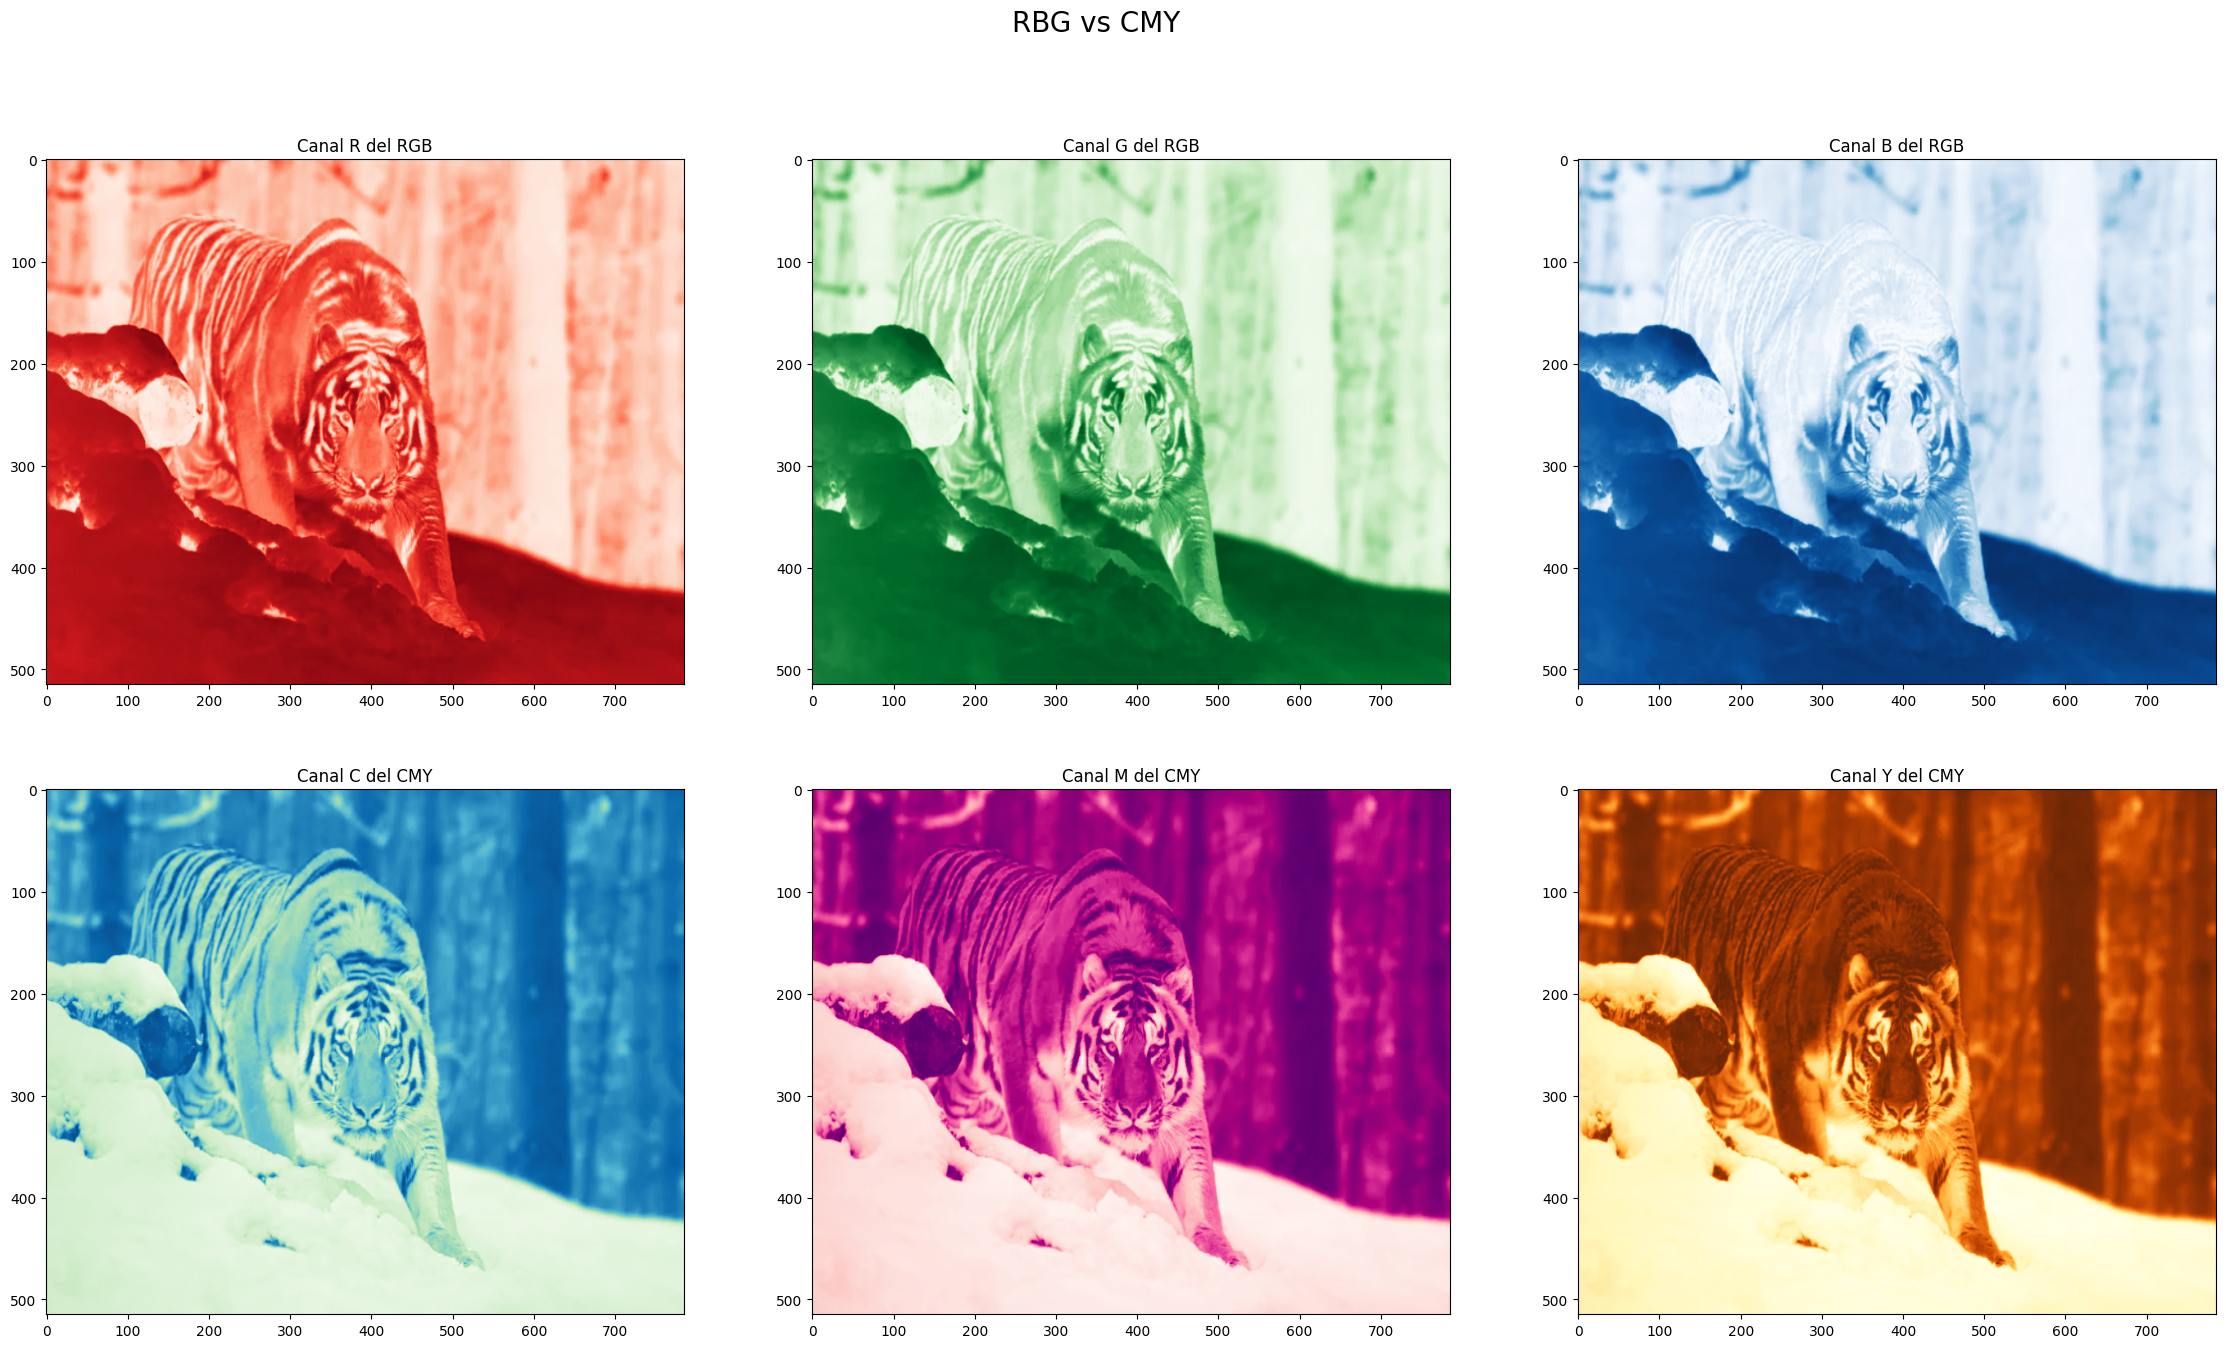

In [169]:
#Aquí se descompone cada canal de la imagen
tigre_R = tigre[:,:,0]
tigre_G = tigre[:,:,1]
tigre_B = tigre[:,:,2]
#Se obtiene cada canal del espacio CMY con una transformación lineal
#a los canales R, G y B
tigre_C = 255 - tigre[:,:,0]
tigre_M = 255 - tigre[:,:,1]
tigre_Y = 255 - tigre[:,:,2]

#Se crea un subplot de 2x3, para mostrar las 6 imágenes y compararlas.
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(28, 15))
fig.suptitle('RBG vs CMY', fontsize=20)
ax1.set_title('Canal R del RGB')
ax1.imshow(tigre_R, cmap='Reds', aspect='auto')
ax2.set_title('Canal G del RGB')
ax2.imshow(tigre_G, cmap='Greens', aspect='auto')
ax3.set_title('Canal B del RGB')
ax3.imshow(tigre_B, cmap='Blues', aspect='auto')
ax4.set_title('Canal C del CMY')
ax4.imshow(tigre_C, cmap='GnBu', aspect='auto')
ax5.set_title('Canal M del CMY')
ax5.imshow(tigre_M, cmap='RdPu', aspect='auto')
ax6.set_title('Canal Y del CMY')
ax6.imshow(tigre_Y, cmap='YlOrBr', aspect='auto')

## Canal más adecuado
**Canal M del CMY** Tanto el canal C como el M y el Y, tienen una buena nitidez y definición perceptible del tigre, pero debido a que el canal C aclara mucho al tigre y tiende a mezclarse un poco más con la nieve, y además el canal Y lo oscurece y hace dificil distinguir muy bien la defición del tigre entre los arboles, el canal M Gana de entre ellos, ya que tiene la ventaja de guardar un equilibrio entre estos dos.

## Actividad 3

En la actividad 1 se aprendió a manipular la matriz de la imagen para dividirla en cuadrantes, la segunda actividad fue de transformar la imagen en diferentes espacios de color y cómo se debe de dividir. En esta actividad se le pide que desarrolle manualmente un algoritmo que le permita transformar una imagen RGB a YUV. La transformación de RGB a YUV se realiza mediante la siguiente fórmula: 

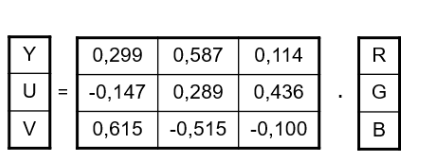

In [6]:
Image("res/actividad3/yuv.png")

Luego de transformar la imagen, se espera que muestre la imagen en los 3 canales de YUV.

(167, 422, 3)


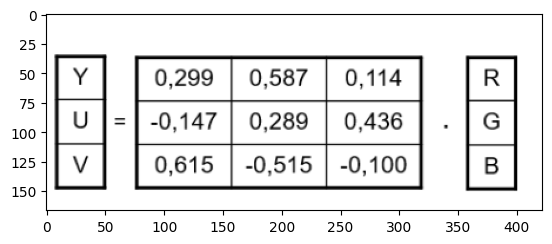

In [36]:
yuv = cv2.imread("res/actividad3/yuv.png",cv2.IMREAD_COLOR)
yuv = cv2.cvtColor(yuv, cv2.COLOR_BGR2RGB)
plt.imshow(yuv)
print(yuv.shape)


In [51]:
def filtroYuv(img):
    rgb2yuv_matrix = np.array([
        [0.299, 0.587, 0.114],
        [-0.147, 0.289, 0.436],
        [0.615, -0.515, -0.100],
    ])
    return np.dot(img,rgb2yuv_matrix).astype(np.uint8)

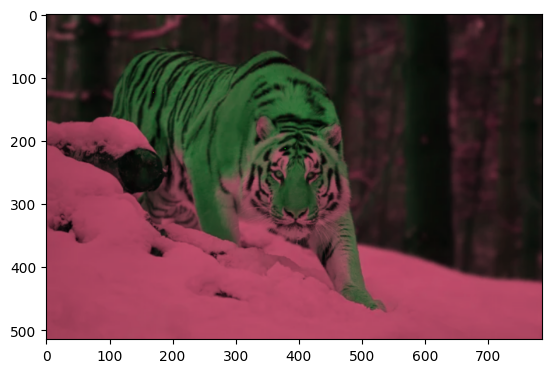

In [52]:
plt.imshow(filtroYuv(tigre))

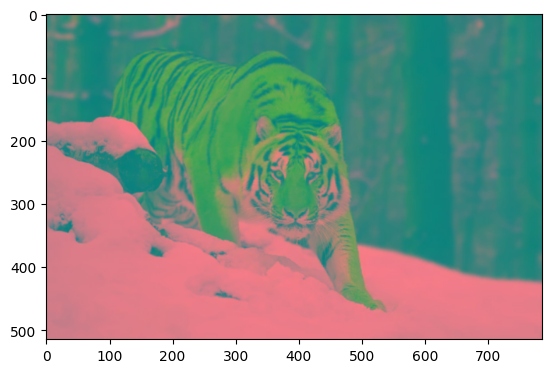

In [55]:
## Resultado Hecho por cv2
img_yuv = cv2.cvtColor(tigre, cv2.COLOR_BGR2YUV)

plt.imshow(img_yuv)